# Lab - working with online data 

In this Lab , you will load , clean and store online flights data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

In [3]:
import requests
import json


In [4]:
import os
import glob
import re
import geopandas as gpd

# Load the data

In [5]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [6]:
res = json.loads(r.content)

In [7]:
df = pd.DataFrame(res['result']['records'])

## display the first rows 

In [8]:
df.head(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,LX,252,SWISS INT`L AIRLINES,2024-03-17T17:10:00,2024-03-17T17:16:00,A,ZRH,ZURICH,ציריך,ZURICH,שוויץ,SWITZERLAND,3,None,None,LANDED,נחתה
1,2,IZ,417,ARKIA ISRAELI AIRLINES,2024-03-17T15:10:00,2024-03-17T17:18:00,D,TBS,TBILISI,טביליסי,TBILISI,גיאורגיה,GEORGIA,3,47-55,B,DEPARTED,המריאה
2,3,LY,2373,EL AL ISRAEL AIRLINES,2024-03-17T16:40:00,2024-03-17T17:18:00,D,BER,BERLIN BRANDENBURG INTL,ברלין,BERLIN,גרמניה,GERMANY,3,78-99,D,DEPARTED,המריאה
3,4,BZ,703,BLUE BIRD AIRWAYS,2024-03-17T17:25:00,2024-03-17T17:21:00,A,ATH,ATHENS,אתונה,ATHENS,יוון,GREECE,3,None,None,LANDED,נחתה
4,5,LY,387,EL AL ISRAEL AIRLINES,2024-03-17T17:00:00,2024-03-17T17:24:00,D,MXP,MILAN-MALPENSA,מילאנו,MILAN,איטליה,ITALY,3,78-99,D,DEPARTED,המריאה
5,6,SK,3183,SAS,2024-03-17T17:00:00,2024-03-17T17:24:00,D,MXP,MILAN-MALPENSA,מילאנו,MILAN,איטליה,ITALY,3,78-99,D,DEPARTED,המריאה
6,7,LH,681,LUFTHANSA,2024-03-17T17:10:00,2024-03-17T17:28:00,D,MUC,MUNICH,מינכן,MUNICH,גרמניה,GERMANY,3,23-33,A,DEPARTED,המריאה
7,8,SN,7172,BRUSSELS AIRLINES,2024-03-17T17:10:00,2024-03-17T17:28:00,D,MUC,MUNICH,מינכן,MUNICH,גרמניה,GERMANY,3,23-33,A,DEPARTED,המריאה
8,9,IZ,821,ARKIA ISRAELI AIRLINES,2024-03-17T16:50:00,2024-03-17T17:31:00,D,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,3,G12-G18,G,DEPARTED,המריאה
9,10,B6,6460,JETBLUE AIRWAYS CORPORATION,2024-03-17T18:10:00,2024-03-17T17:37:00,A,JFK,NEW YORK - J.F.KENNEDY,ניו יורק,NEW YORK,ארצות הברית,UNITED STATES,3,None,None,LANDED,נחתה


### display the last 10 rows - What's wrong? 

In [9]:
df.tail(10)

# I assume there shuold be many nulls, but there aren't except for 2 specific columns

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
1449,1450,AM,7866,AERO MEXICO,2024-03-21T17:05:00,2024-03-21T17:05:00,D,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,ON TIME,בזמן
1450,1451,AR,7873,AEROLINEAS ARGENTINAS S.A.,2024-03-21T17:05:00,2024-03-21T17:05:00,D,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,ON TIME,בזמן
1451,1452,IB,2396,IBERIA,2024-03-21T17:05:00,2024-03-21T17:05:00,D,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,ON TIME,בזמן
1452,1453,LY,351,EL AL ISRAEL AIRLINES,2024-03-21T17:05:00,2024-03-21T17:05:00,D,MUC,MUNICH,מינכן,MUNICH,גרמניה,GERMANY,3,None,None,ON TIME,בזמן
1453,1454,LY,397,EL AL ISRAEL AIRLINES,2024-03-21T17:05:00,2024-03-21T17:05:00,D,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,ON TIME,בזמן
1454,1455,LX,252,SWISS INT`L AIRLINES,2024-03-21T17:10:00,2024-03-21T17:10:00,A,ZRH,ZURICH,ציריך,ZURICH,שוויץ,SWITZERLAND,3,None,None,NOT FINAL,לא סופי
1455,1456,LY,2367,EL AL ISRAEL AIRLINES,2024-03-21T17:10:00,2024-03-21T17:10:00,D,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,3,None,None,ON TIME,בזמן
1456,1457,LY,312,EL AL ISRAEL AIRLINES,2024-03-21T17:10:00,2024-03-21T17:10:00,A,LTN,LUTON,לונדון לוטון,LONDON LUTON,בריטניה,UNITED KINGDOM,3,None,None,NOT FINAL,לא סופי
1457,1458,AM,7877,AERO MEXICO,2024-03-21T17:15:00,2024-03-21T17:15:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,None,None,ON TIME,בזמן
1458,1459,LY,317,EL AL ISRAEL AIRLINES,2024-03-21T17:15:00,2024-03-21T17:15:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,None,None,ON TIME,בזמן


# clean the data

how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)

In [10]:
print('Column    Null(%)')
print('-----------------')

for col in df.columns:
    nulls = df[col].isna().sum()
    total = len(df)
    print('{:<8} {:>8}'.format(str(col), np.round(100*nulls/total, 1)))

Column    Null(%)
-----------------
_id           0.0
CHOPER        0.0
CHFLTN        0.0
CHOPERD       0.0
CHSTOL        0.0
CHPTOL        0.0
CHAORD        0.0
CHLOC1        0.0
CHLOC1D       0.0
CHLOC1TH      0.0
CHLOC1T       0.0
CHLOC1CH      0.0
CHLOCCT       0.0
CHTERM        0.0
CHCINT       59.2
CHCKZN       59.2
CHRMINE       0.0
CHRMINH       0.0


drop the empty rows  

In [11]:
# Iterate over df rows and drop rows with more than 50% null values
for index, row in df.iterrows():
    nullcount = row[['CHOPER','CHFLTN','CHSTOL','CHPTOL','CHAORD','CHLOC1','CHLOC1T','CHLOCCT','CHTERM','CHRMINE']].isnull().sum()
    totalcount = len(['CHOPER','CHFLTN','CHSTOL','CHPTOL','CHAORD','CHLOC1','CHLOC1T','CHLOCCT','CHTERM','CHRMINE'])
    null_percentage = (nullcount / totalcount) * 100

    if null_percentage > 50:
        df = df.drop(index)

# Not expecting any rows to be deleted as there are no columns other than 'CHCINT' and 'CHCKZN' with null values

format the current date with underscore separation (%d_%m_%y)

In [12]:
today = dt.datetime.now().strftime("%d_%m_%Y")
today

'18_03_2024'

Drop the _id column 

In [13]:
df.drop('_id', axis = 1, inplace = True)


save the raw data (add the current date to the file name) 

In [14]:
# Changing the planned/actual time data type now before combining
df[['CHSTOL', 'CHPTOL']] = df[['CHSTOL', 'CHPTOL']].astype('datetime64[s]')

Extract latest clean data combined file to combine with new clean data

In [15]:
def read_latest_cleandata_file(directory):
    '''
    Fnction for extracting the latest "cleandata" file into a dataframe
    Date: 11.03.24
    Author: Noa
    Input: directory - the directory where the "cleandata" files are stored
    Output: df - the dataframe of the latest "cleandata" file
    '''
    # Get list of all "cleandata" files in the directory with the pattern "cleandata_%d%m%Y"
    files = glob.glob(os.path.join(directory, "cleandata_*"))
    
    # Filter files to match the specific pattern
    files = [f for f in files if re.search(r'cleandata_\d{2}_\d{2}_\d{4}', f)]
    
    # Find the latest file
    latest_file = max(files, key=os.path.getmtime)
    
    # Read the latest file into a DataFrame
    df = pd.read_csv(latest_file)
    
    return df

# Usage
directory = "C:\\PythonProject"
olddata = read_latest_cleandata_file(directory)

In [16]:
# Combine the old cleandata with the new data
newdata = df[['CHOPER','CHFLTN','CHSTOL','CHPTOL','CHAORD','CHLOC1','CHLOC1T','CHLOCCT','CHTERM','CHCKZN','CHRMINE']]

alldata = pd.DataFrame(np.concatenate([olddata.values,newdata.values]),columns=olddata.columns)
alldata.drop_duplicates(inplace=True)
alldata.to_csv('cleandata_' + today + '.csv', index=False)

select the airline code and name without duplicates (CHOPER,CHOPERD)

In [17]:
al1 = df[['CHOPER','CHOPERD']].drop_duplicates()


Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [18]:
al2 = pd.read_csv('airlines.csv')
airlines = pd.concat([al1,al2]).drop_duplicates()
airlines.to_csv('airlines.csv', index=False)

Drop the Airline name column 

In [19]:
df.drop('CHOPERD', axis = 1, inplace = True)

Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [20]:
ap1 = df[['CHLOC1','CHLOC1D']]
ap2 = pd.read_csv('airports.csv')
airports = pd.concat([ap1,ap2]).drop_duplicates()
airports.to_csv('airports.csv', index=False)

In [21]:
df.drop('CHLOC1D', axis = 1, inplace = True)

drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [22]:
df.drop(['CHLOC1TH','CHLOC1CH','CHRMINH'], axis = 1, inplace = True)

### rename the columns 

In [23]:
df.rename(columns = {
    'CHOPER': 'Airline',
    'CHFLTN': 'FlightNum',
    'CHSTOL': 'PlanTime',
    'CHPTOL': 'ActualTime',
    'CHAORD': 'Direction',
    'CHLOC1': 'Airport',
    'CHLOC1T': 'City',
    'CHLOCCT': 'Country',	
    'CHTERM': 'Terminal',	
    'CHCINT': 'CheckinCounters',	
    'CHCKZN': 'CheckinZone',
    'CHRMINE': 'Status',
},
inplace=True)

Change the PlanTime and ActualTime columns type to np.datetime64

In [24]:
# Did this before combining the old and new clean data

Save the clean data 

In [25]:
df.to_csv('run_' + today + '.csv', index=False)

update the file final.csv with departed, landed and canceled flights only

In [26]:
# Making a temp csv for today's run, the final csv analysed will be made up of all runs
new_df = df.query('Status in ("DEPARTED", "LANDED", "CANCELED")')
new_df.to_csv('run_' + today + '.csv', index=False)

Creating a unified file for all the runs in order to have a more comprehensible dataset

In [27]:
def combine_files(directory, filename_pattern, output_filename):
    '''
    Function for combining all files in a directory that match a filename pattern into a single file.
    Date: 11.03.24
    Author: Noa
    Input: 
    directory (str): The directory to search for files.
    filename_pattern (str): The filename pattern to match.
    output_filename (str): The name of the output file.
    
    Returns:
    None
    '''
    
    # Use glob to find all files in directory that match the filename pattern
    files = glob.glob(os.path.join(directory, filename_pattern))
    
    # Initialize an empty DataFrame to store the combined data
    df_combined = pd.DataFrame()

    # Loop through the list of files
    for i, file in enumerate(files):
        # Read the current file into a DataFrame
        df_temp = pd.read_csv(file)
        
        # If this is not the first file, skip the first row (assuming it's a header)
        if i > 0:
            df_temp = df_temp[1:]
        
        # Append the data from the current file to the combined DataFrame
        df_combined = pd.concat([df_combined, df_temp], ignore_index=True)

    # Remove duplicate rows from the combined DataFrame
    df_combined.drop_duplicates(inplace=True)
    
    # Write the combined DataFrame to a CSV file
    df_combined.to_csv(output_filename, index=False)

# Usage
combine_files('C:\\PythonProject', '*run*', 'final.csv')

Add a new column for total delay in minutes

In [28]:
# Read the combined file into a DataFrame
df_combined = pd.read_csv('final.csv')

# Convert the PlanTime and ActualTime columns to datetime
df_combined[['PlanTime', 'ActualTime']] = df_combined[['PlanTime', 'ActualTime']].astype('datetime64[s]')

# Calculate the delay in minutes
for index, row in df_combined.iterrows():
    time_difference_seconds = (row['ActualTime'] - row['PlanTime']).total_seconds()

    df_combined.at[index, 'Delay'] = max(time_difference_seconds / 60, 0)

df_combined.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,CheckinCounters,CheckinZone,Status,Delay
0,LX,253,2024-03-10 18:20:00,2024-03-10 19:03:00,D,ZRH,ZURICH,SWITZERLAND,3,21-33,A,DEPARTED,43.0
1,IZ,822,2024-03-10 18:55:00,2024-03-10 19:04:00,A,ETM,RAMON,ISRAEL,3,NaN,NaN,LANDED,9.0
2,AR,7879,2024-03-10 18:00:00,2024-03-10 19:10:00,D,FCO,ROME,ITALY,3,78-99,D,DEPARTED,70.0
3,LY,383,2024-03-10 18:00:00,2024-03-10 19:10:00,D,FCO,ROME,ITALY,3,78-99,D,DEPARTED,70.0
4,TP,8900,2024-03-10 18:00:00,2024-03-10 19:10:00,D,FCO,ROME,ITALY,3,78-99,D,DEPARTED,70.0


What is the average delay for departed flights

In [29]:
df_combined.query('Status == "DEPARTED"')['Delay'].mean()

27.177996422182467

Average delay for landing flights

In [30]:
df_combined.query('Status == "LANDED"')['Delay'].mean()

11.743048897411313

Joining the airlines and airports names with the data to later display the delay per airline and airport

In [31]:
# Airlines:
mrg_df = pd.merge(df_combined, airlines, left_on ='Airline', right_on = 'CHOPER')
mrg_df = mrg_df.rename(columns={'CHOPER': 'Airline', 'CHOPERD': 'AirlineName'})

# Airports:
mrg_df = pd.merge(mrg_df, airports, left_on ='Airport', right_on = 'CHLOC1')
mrg_df = mrg_df.rename(columns={'CHLOC1': 'Airport', 'CHLOC1D': 'AirportName'})

Adding a column with the hour of the day regardless of date and minutes

In [32]:
mrg_df['Hour'] = mrg_df['PlanTime'].dt.hour

Adding a column with the day of the week

In [33]:
mrg_df['DayOfWeek'] = mrg_df['PlanTime'].dt.day_name()

Creating two different datasets of landed and departed flights

In [34]:
landed = mrg_df[mrg_df['Status'] == 'LANDED']
departed = mrg_df[mrg_df['Status'] == 'DEPARTED']

# Visualizations

Histogram of delay distribution (number of flights by average delay) - departed flights

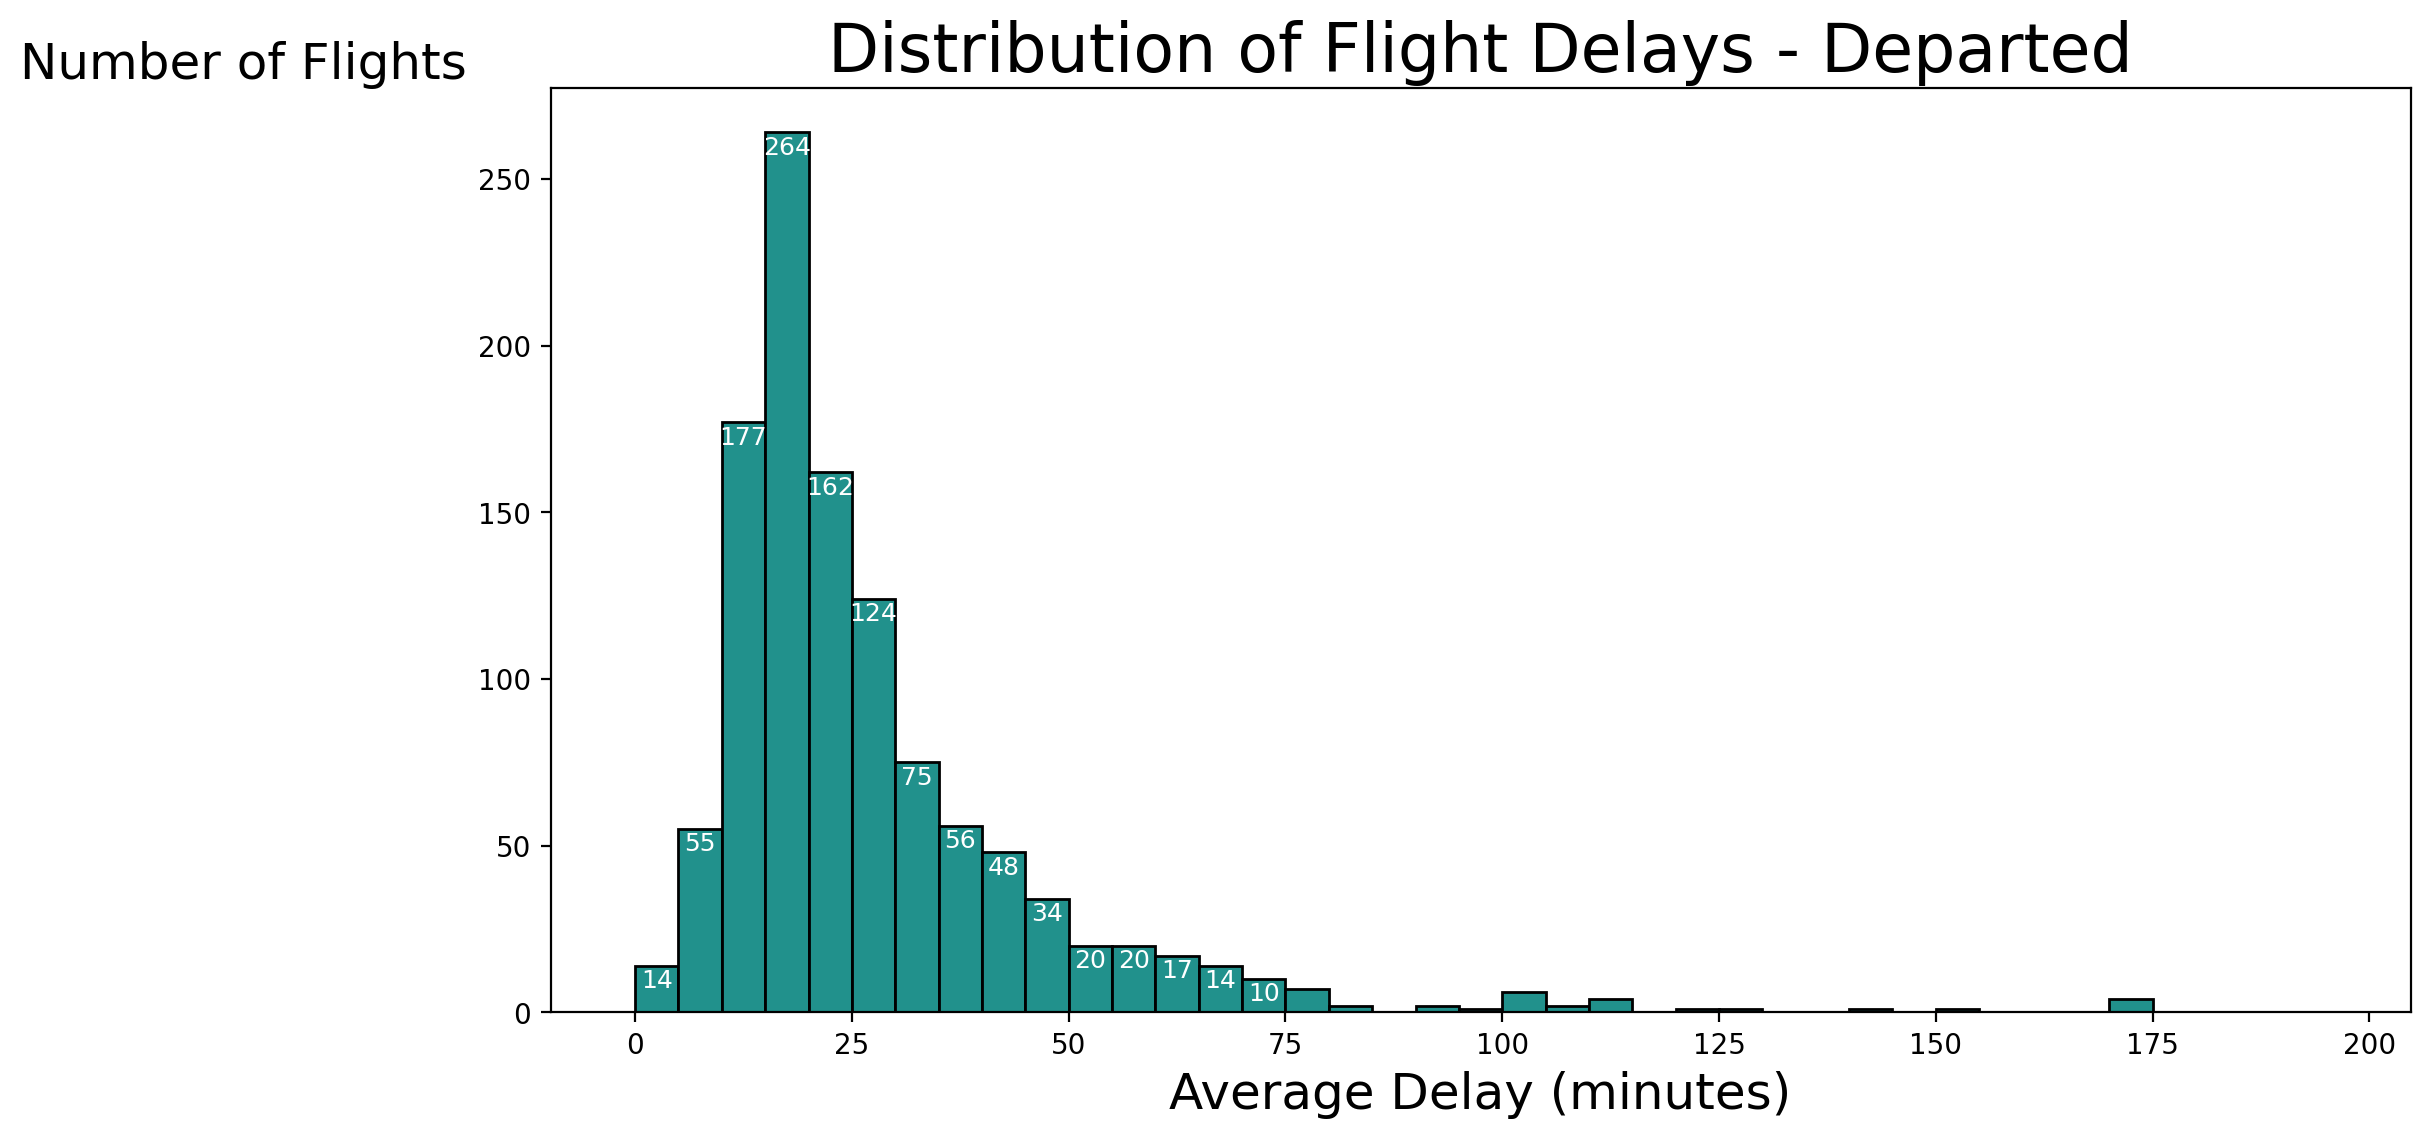

In [35]:
plt.figure(figsize=(12, 6), dpi=200)
counts, bins, patches = plt.hist(departed['Delay'], bins=range(0, 200, 5), color='#21918c', edgecolor='black')

# Add value labels to the bars
label_size = plt.rcParams['font.size'] - 1
for count, bin, patch in zip(counts, bins, patches):
    height = patch.get_height()
    if height > label_size:
        plt.text(bin + 2.5, height - label_size/2, int(count), ha='center', va='center', color='white', fontsize=label_size)

plt.title('Distribution of Flight Delays - Departed', fontsize = 24)
plt.xlabel('Average Delay (minutes)', fontsize = 18)
plt.ylabel('Number of Flights', rotation=0, loc = 'top', fontsize = 18)
#plt.yticks([])
plt.show()

Histogram of delay distribution (number of flights by average delay) - landed flights

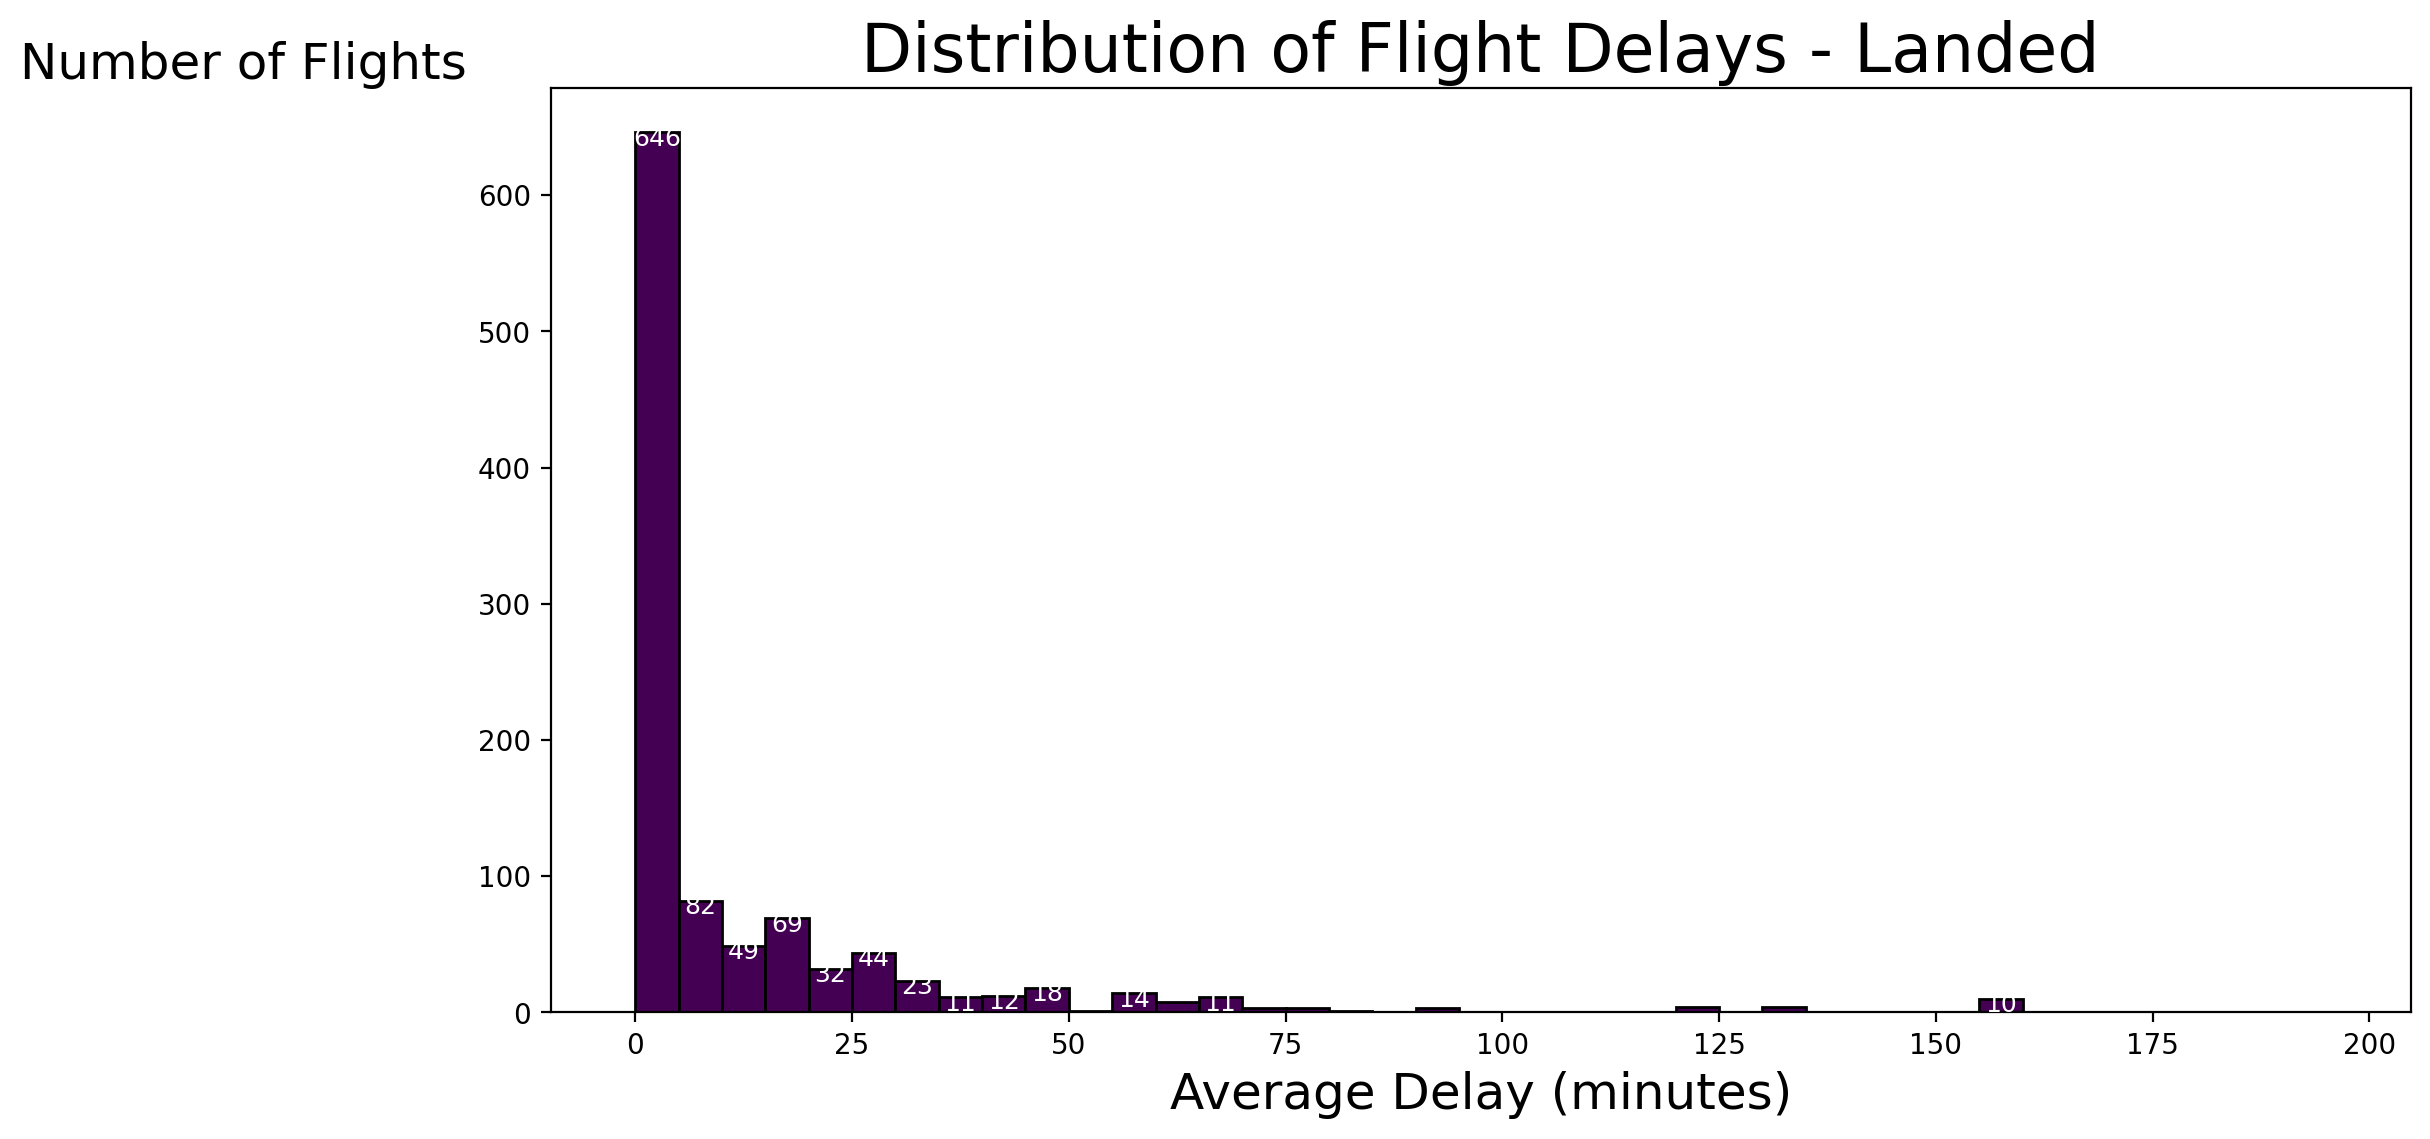

In [36]:
plt.figure(figsize=(12, 6), dpi=200)
counts, bins, patches = plt.hist(landed['Delay'], bins=range(0, 200, 5), color='#440154', edgecolor='black')

# Add value labels to the bars
label_size = plt.rcParams['font.size'] - 1
for count, bin, patch in zip(counts, bins, patches):
    height = patch.get_height()
    if height > label_size:
        plt.text(bin + 2.5, height - label_size/2, int(count), ha='center', va='center', color='white', fontsize=label_size)

plt.title('Distribution of Flight Delays - Landed', fontsize = 24)
plt.xlabel('Average Delay (minutes)', fontsize = 18)
plt.ylabel('Number of Flights', rotation=0, loc = 'top', fontsize = 18)
#plt.yticks([])
plt.show()

Comparing Landed and Departed flights delays along the day

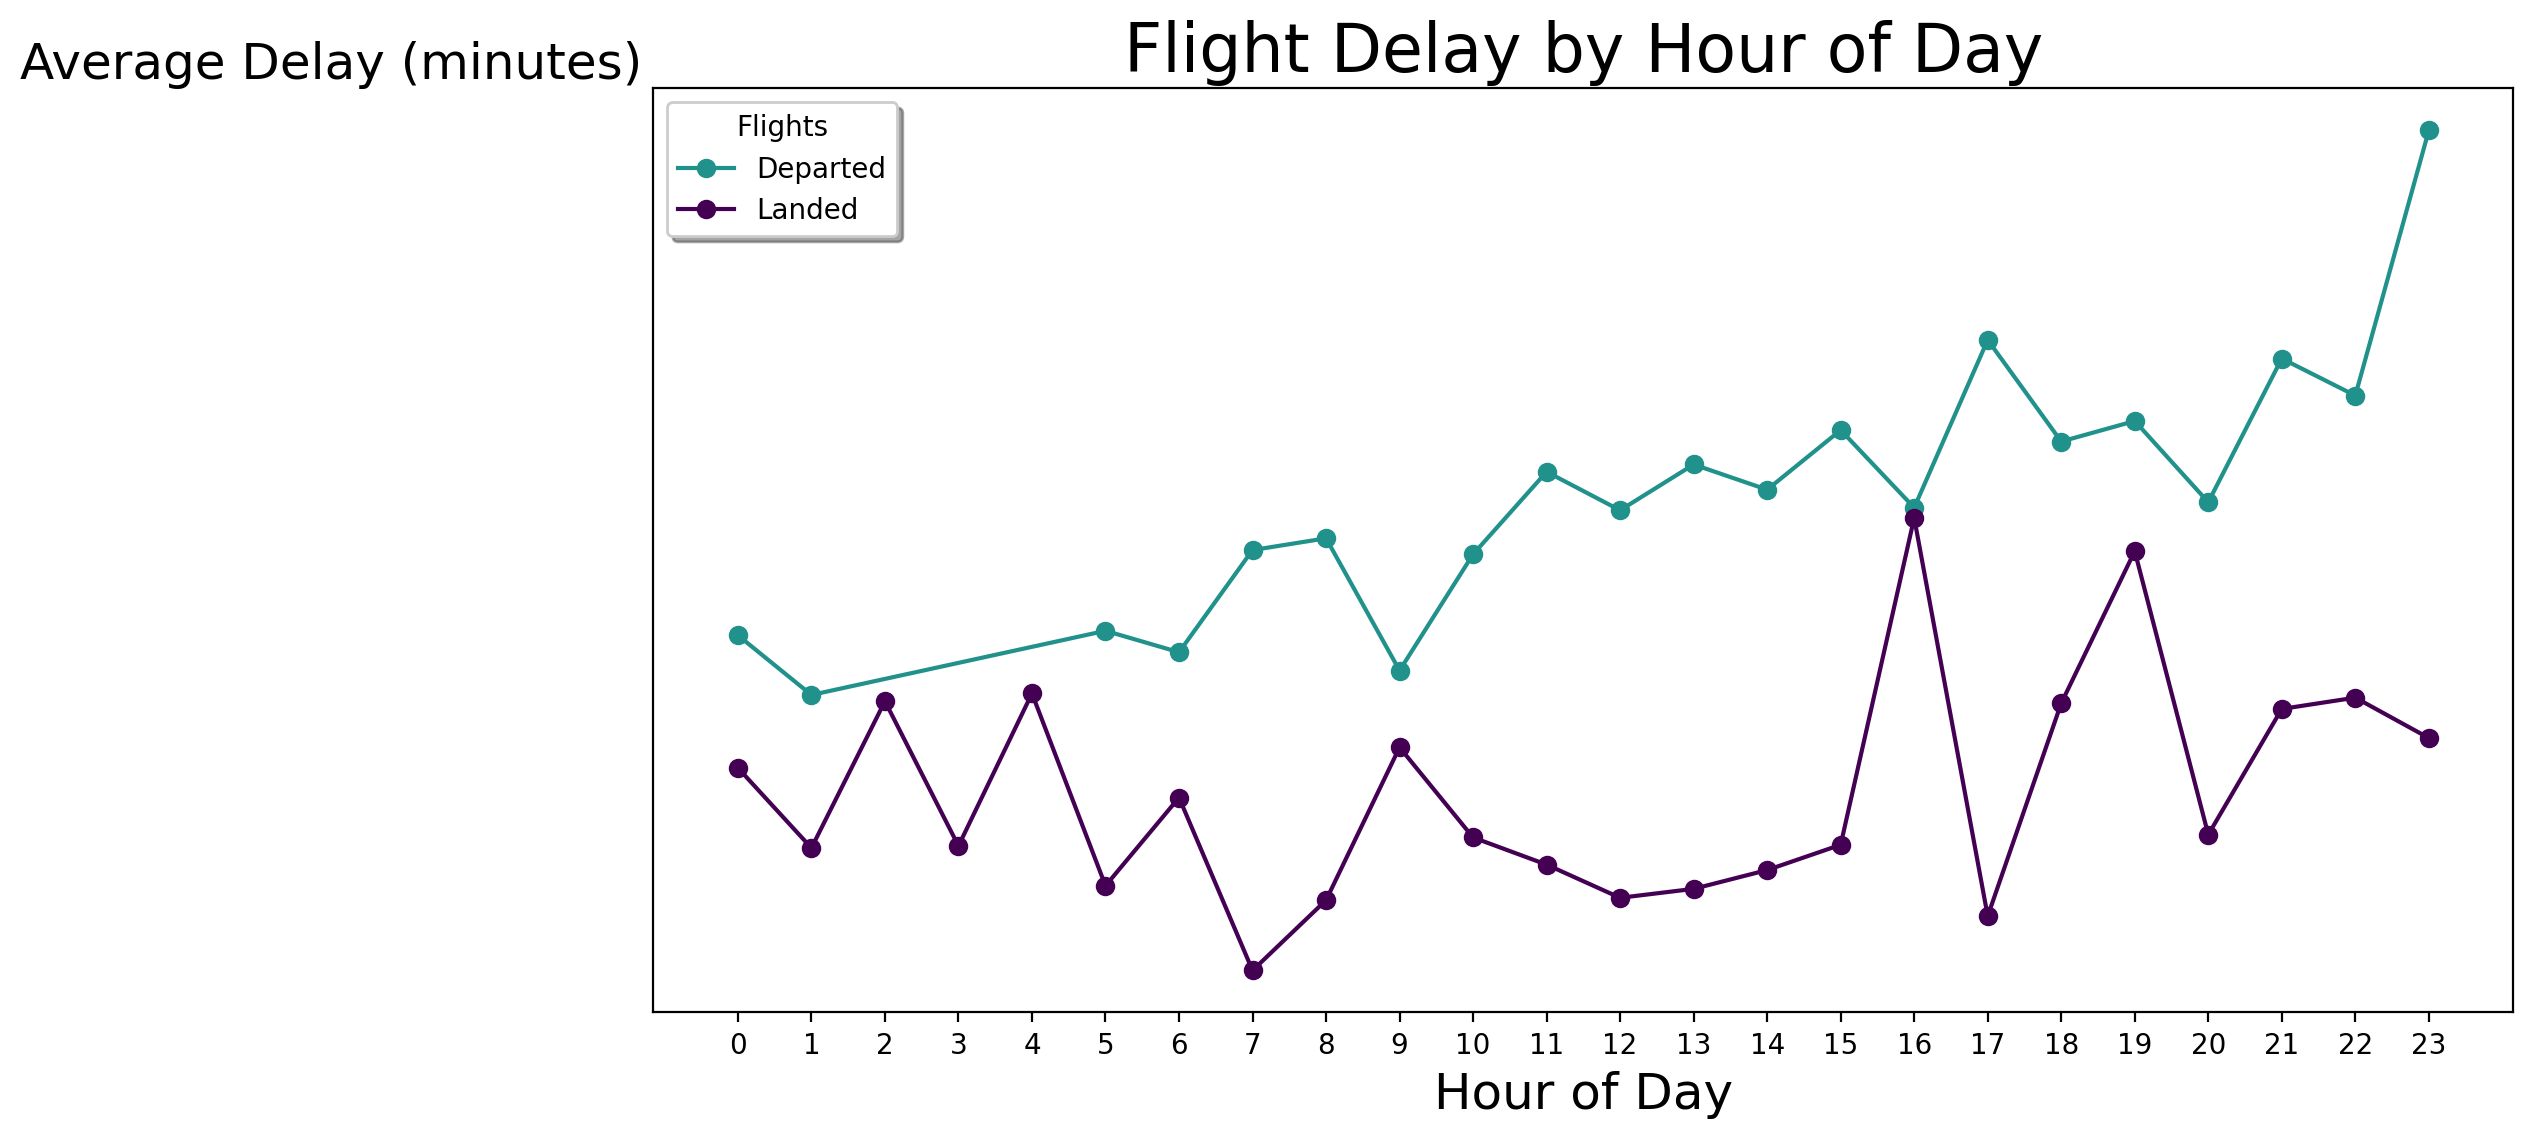

In [39]:
# Calculating the average delay per hour of day
AvgDelayLand = landed.groupby(['Hour'])['Delay'].mean()
AvgDelayDep = departed.groupby(['Hour'])['Delay'].mean()

plt.figure(figsize=(12, 6), dpi = 200)
plt.plot(AvgDelayDep, label = 'Departed', color = '#21918c', marker = 'o')
plt.plot(AvgDelayLand, label = 'Landed', color = '#440154', marker = 'o')

plt.xlabel('Hour of Day', fontsize = 18)
plt.ylabel('Average Delay (minutes)', rotation=0, loc = 'top', fontsize = 18)
plt.title('Flight Delay by Hour of Day', fontsize = 24)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.legend(loc = 'upper left', title = 'Flights', shadow = True)
plt.show()

Top 10 airlines by average delay time

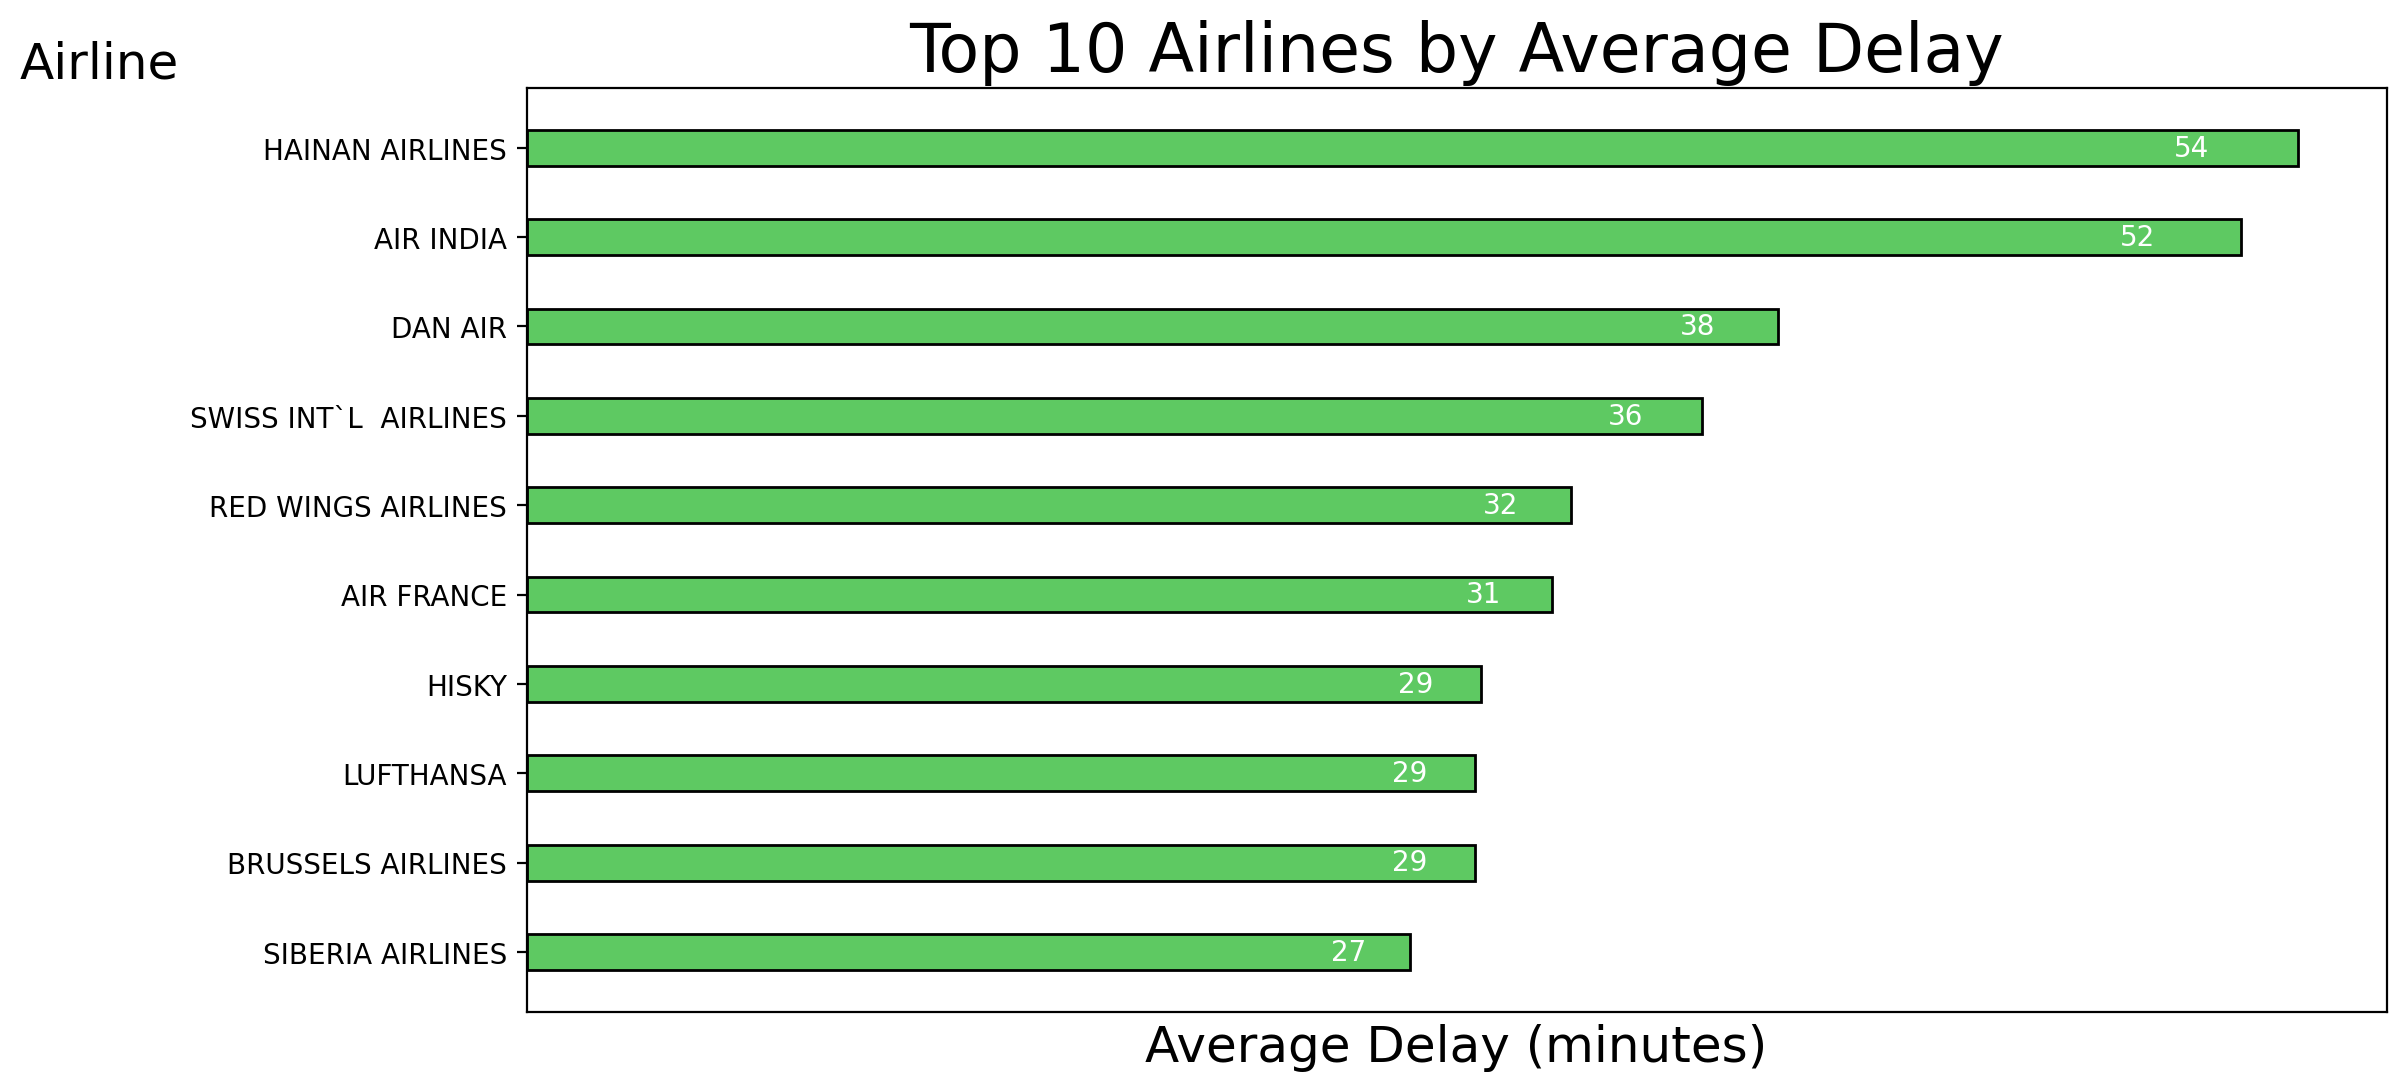

In [ ]:
# Calculate the average delay per airline - top 10 in ascending order
AvgDelay_AL = mrg_df.groupby(['AirlineName'])['Delay'].mean().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(12, 6), dpi = 200)
bars = plt.barh(AvgDelay_AL.index, AvgDelay_AL.values, height = 0.4, color = '#5ec962', edgecolor='black')

# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.05 * width, bar.get_y() + bar.get_height()/2.0, int(width), ha='right', va='center', color='white')

plt.xlabel('Average Delay (minutes)', fontsize = 18)
plt.ylabel('Airline', rotation = 0, loc = 'top', fontsize = 18)
plt.title('Top 10 Airlines by Average Delay', fontsize = 24)
plt.xticks([])
plt.show()

Top 10 airlines by percentage of delayed flights

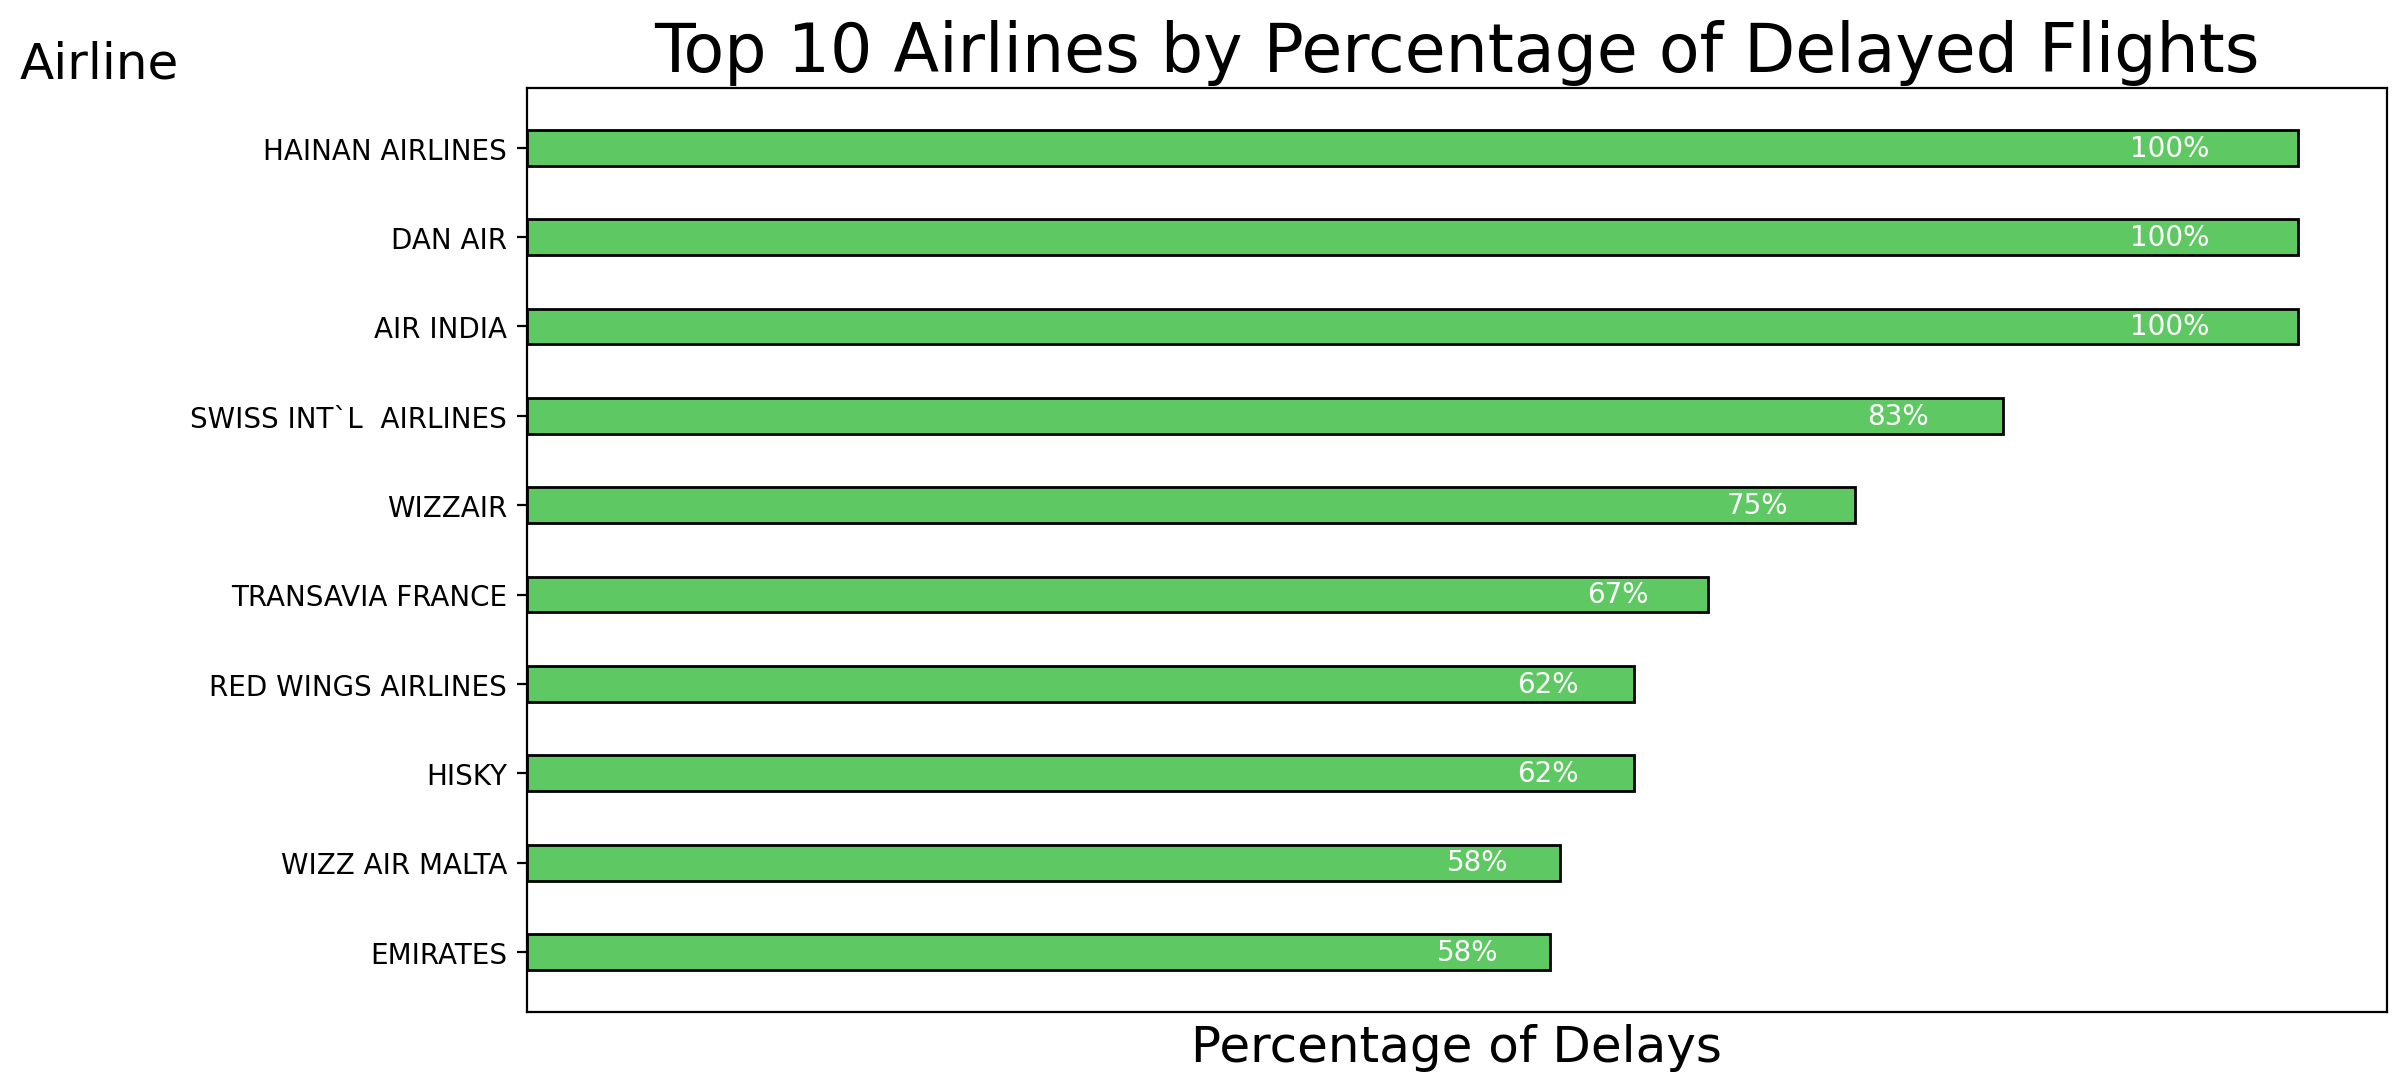

In [ ]:
# Calculate total number of flights per airline
TotalFlights_AL = mrg_df.groupby('AirlineName')['Delay'].count()

# Calculate number of delays per airline (delay > 15 minutes)
NumDelays_AL = mrg_df[mrg_df['Delay'] > 15].groupby('AirlineName')['Delay'].count()

# Calculate percentage of delays
PctDelays_AL = ((NumDelays_AL / TotalFlights_AL) * 100).nlargest(10)
PctDelays_AL.sort_values(ascending=True, inplace=True)

# Plot the percentage of delays per airline
plt.figure(figsize=(12, 6), dpi = 200)
bars = plt.barh(PctDelays_AL.index, PctDelays_AL.values, height = 0.4, color = '#5ec962', edgecolor='black')

# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.05 * width, bar.get_y() + bar.get_height()/2.0, '{:.0f}%'.format(width), ha='right', va='center', color='white')

plt.xlabel('Percentage of Delays', fontsize = 18)
plt.ylabel('Airline', rotation = 0, loc = 'top', fontsize = 18)
#plt.xticks([0, 20, 40, 60, 80, 100], labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks([])
plt.title('Top 10 Airlines by Percentage of Delayed Flights', fontsize = 24)
plt.show()

Top 10 airports by average delay time - landed flights

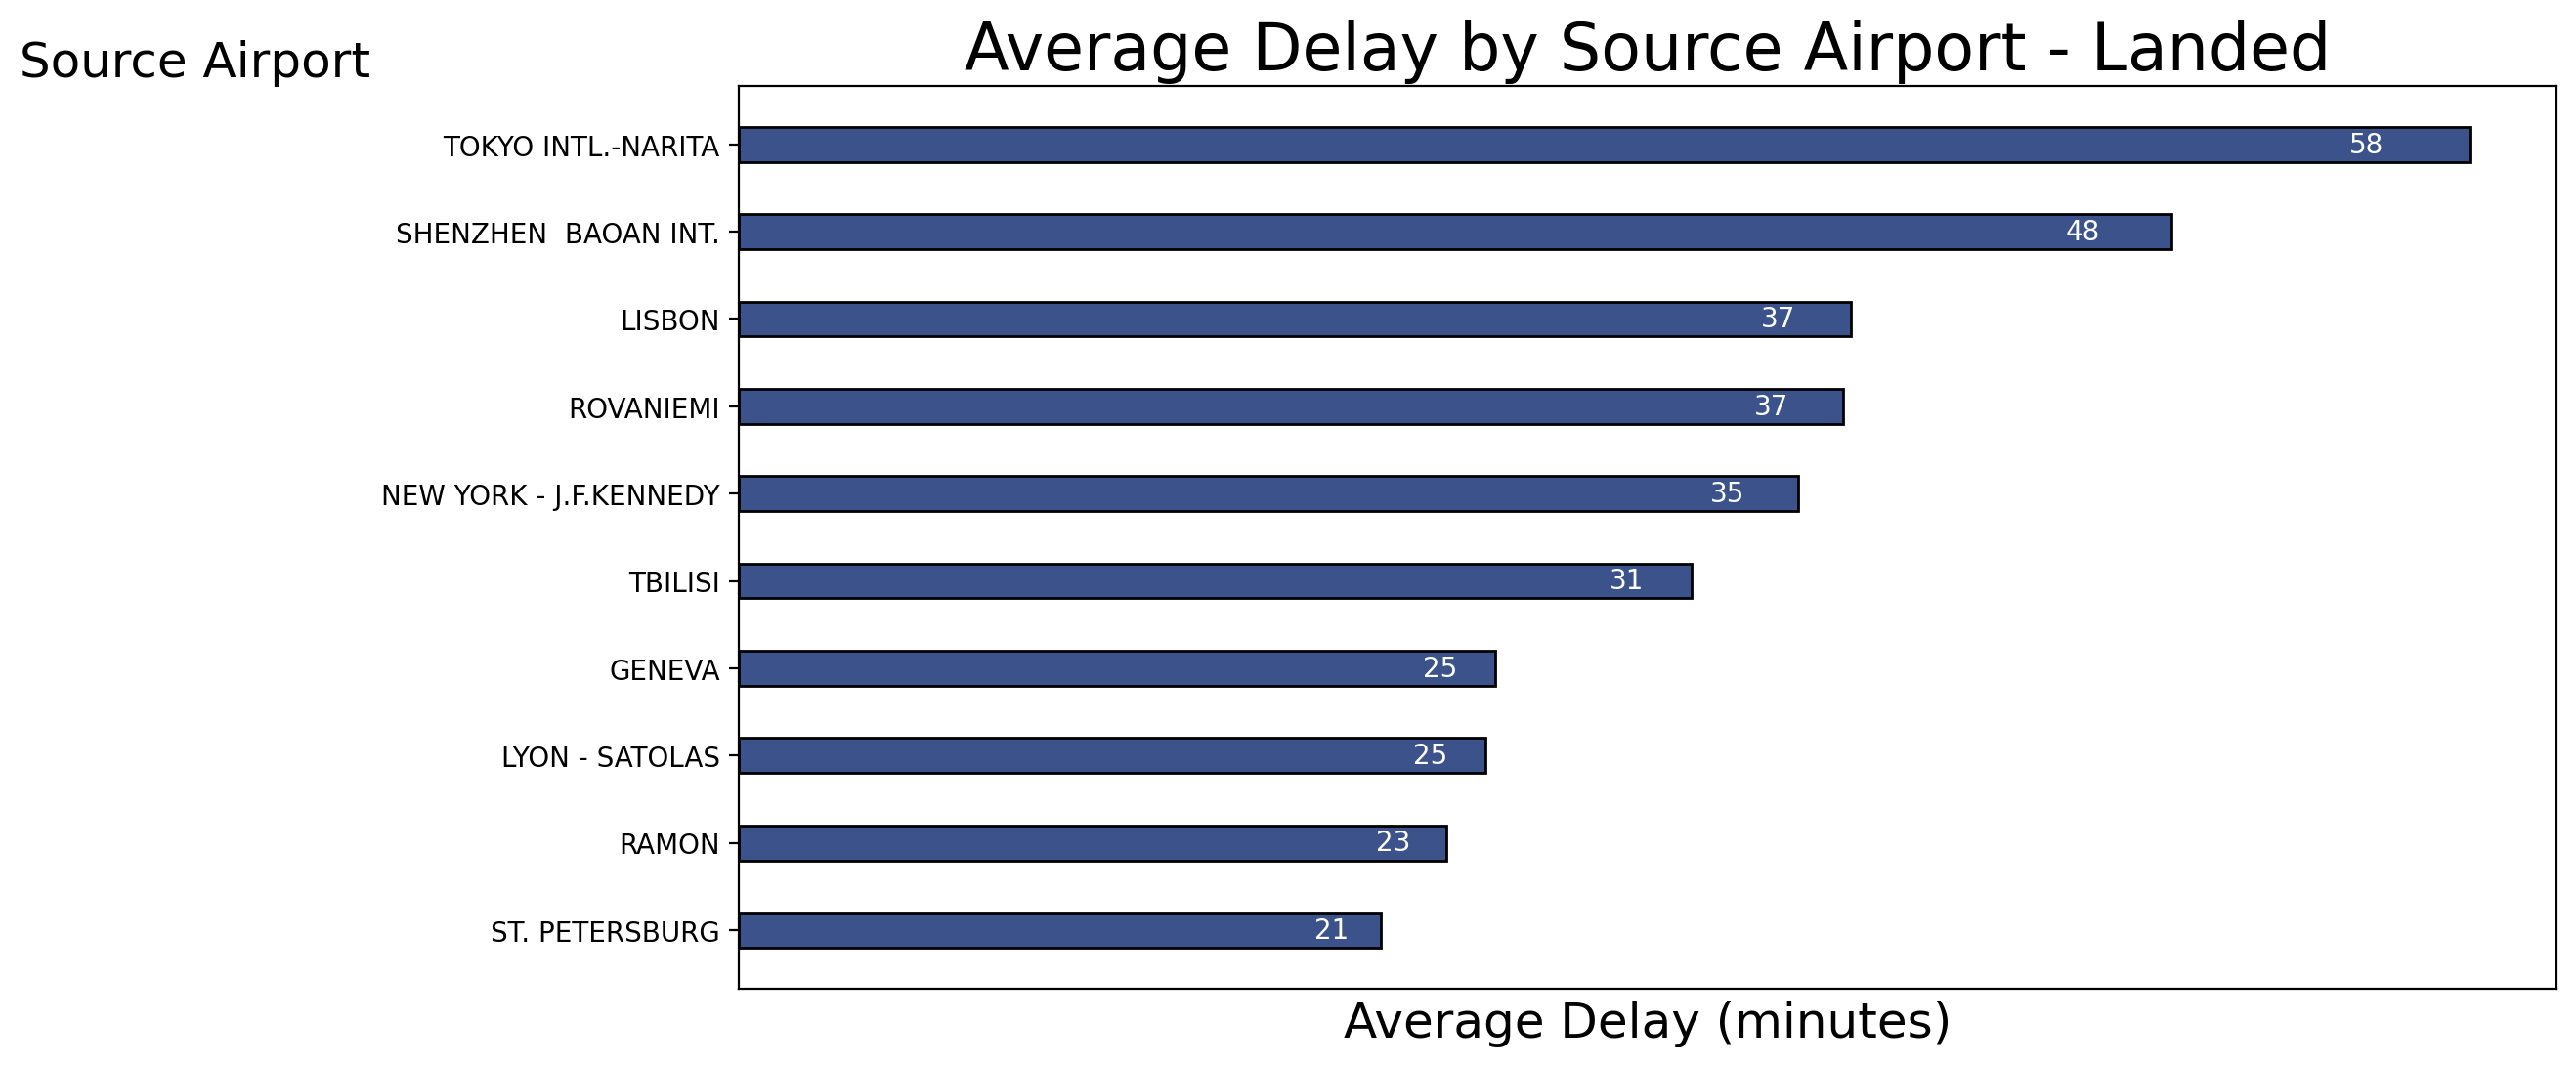

In [ ]:
# Calculate the average delay per source airport
AvgDelay_AP = landed.groupby(['AirportName'])['Delay'].mean().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(12, 6), dpi = 200)
bars = plt.barh(AvgDelay_AP.index, AvgDelay_AP.values, height = 0.4, color = '#3b528b', edgecolor='black')

# Add value labels to the bars
for bar in bars:
    width = bar.get_width()  # Get the width of the bar
    plt.text(width - 0.05 * width, bar.get_y() + bar.get_height()/2.0, int(width), ha='right', va='center', color='white')

plt.xlabel('Average Delay (minutes)', fontsize = 18)
plt.ylabel('Source Airport', rotation = 0, loc = 'top', fontsize = 18)
plt.title('Average Delay by Source Airport - Landed', fontsize = 24)
plt.xticks([])
plt.show()

Average delay per source country

C:\Users\noash\AppData\Local\Temp\ipykernel_18480\1044436737.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


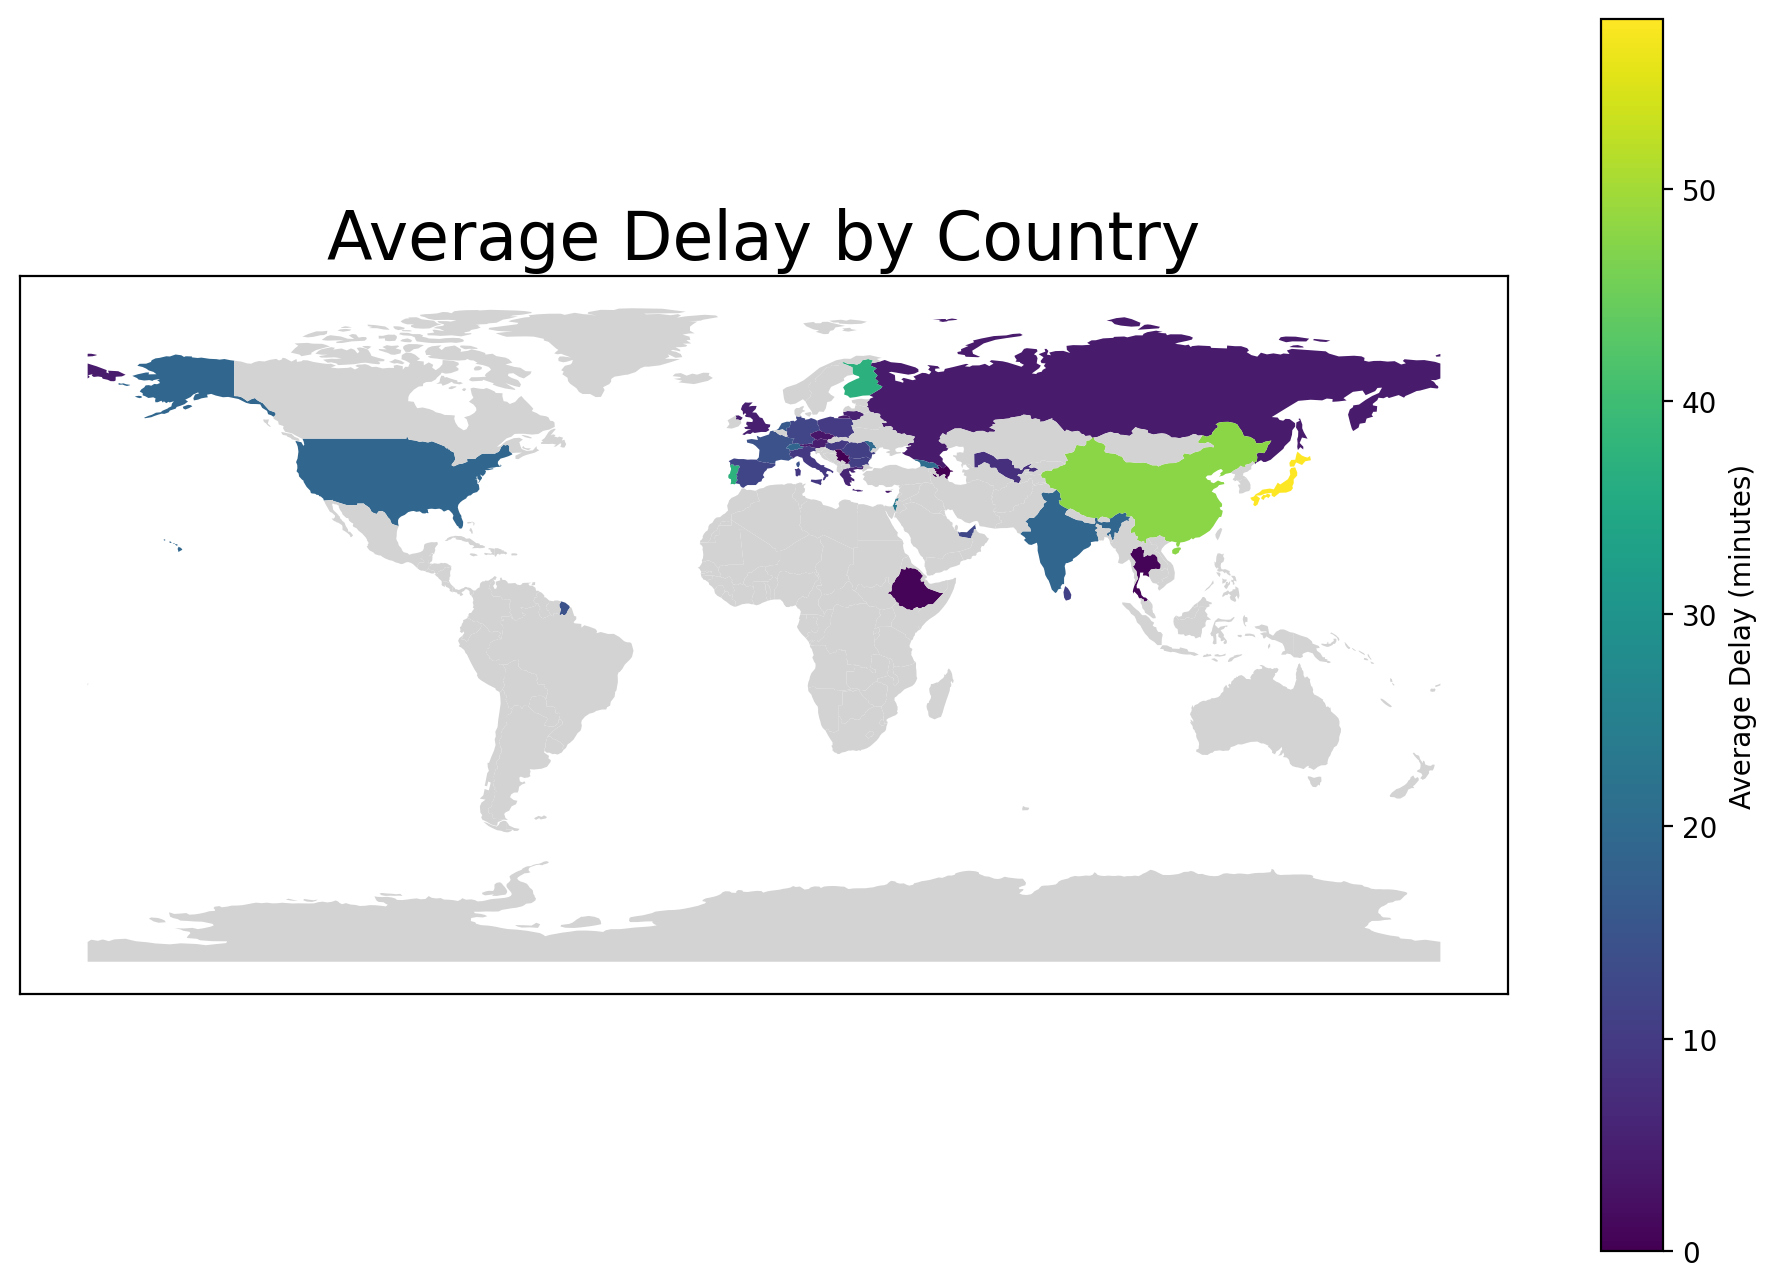

In [ ]:
# Calculate the average delay per source country
AvgDelay_CT = landed.groupby(['Country'])['Delay'].mean()

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Replace casing and country names to match the data
world['name'] = world['name'].str.upper()
world['name'] = world['name'].replace({
    'CZECHIA': 'CZECH REPUBLIC',
    'RUSSIA': 'RUSSIAN FEDERATION',
    'UNITED STATES OF AMERICA': 'UNITED STATES'
    })

# Convert AvgDelay_CT to a DataFrame
df_AvgDelay_CT = pd.DataFrame(AvgDelay_CT)

# Merge world map and df_AvgDelay_CT using the index of df_AvgDelay_CT
merged = world.set_index('name').join(df_AvgDelay_CT, how='left')

# Plot world map
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)

# Plot the countries that are in df_AvgDelay_CT
merged[~merged['Delay'].isna()].plot(column='Delay', ax=ax, legend=True, legend_kwds={"label": "Average Delay (minutes)", "orientation": "vertical"}, cmap='viridis', linewidth=0.8)

# Plot the countries that are not in df_AvgDelay_CT with a specific color
merged[merged['Delay'].isna()].plot(ax=ax, color='lightgrey')

ax.set_title('Average Delay by Country', fontsize = 24)
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude', rotation = 0, loc = 'top')
plt.xticks([])
plt.yticks([])
plt.show()